# Scoring

In this notebook we use the code we have implemented to assess the saftey based on rules 1 and 2 of RSS

## Import Nuscenes data
Using DICE this will take much longer on the first run. This is because the data is cached after that

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

import numpy as np
from tqdm import tqdm

from minf_part1_functions import *
from my_nuscenes_functions import *

# dataroot = 'data/sets/nuscenes'
dataroot = '/Volumes/kingston/v1.0-mini'
# nusc = NuScenes(version='v1.0-trainval', dataroot=dataroot, verbose=True)
nusc = NuScenes(version='v1.0-mini', dataroot=dataroot, verbose=False)

In [11]:
scores = []

for scene in tqdm(nusc.scene):
    sample = nusc.get('sample', scene['first_sample_token'])

    def get_score(score_dict):
        return score_dict['score']

    instances = set()

    done = False
    # loop through all samples in scenes
    while not done:
        # loop through all annotations in sample
        for ann in sample['anns']:
            instance_token = nusc.get('sample_annotation', ann)['instance_token']
            instance = nusc.get('instance', instance_token)
            category = nusc.get('category', instance['category_token'])['name']
            if instance_token not in instances and 'vehicle' in category:
                s = generate_scores_for_instance(nusc, instance_token, aggressive=True)
                if s:
                    s = min(s, key=get_score)
                    s['instance'] = instance_token
                    scores.append(s)
                    instances.add(instance_token)
        
        # check for next sample
        if sample['next']:
            sample = nusc.get('sample', sample['next'])
        else:
            done = True

100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


In [17]:
xs = [score for score in scores if score['score'] < 1]
xs

249

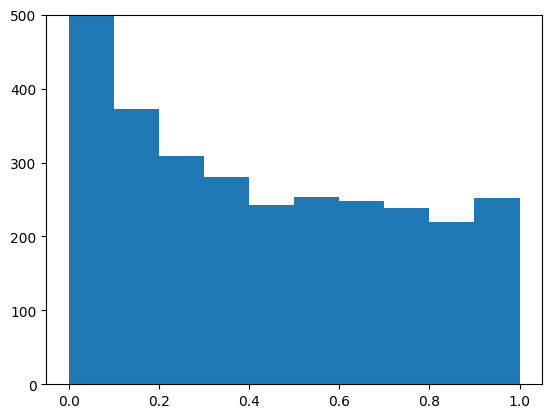

In [12]:
import matplotlib.pyplot as plt
plt.hist([x['score'] for x in xs])
plt.ylim(0, 500)
plt.show()

In [ ]:
sample = nusc.get('sample',scene['first_sample_token'])
v = []
t = []
done = False
while not done:
    v.append(np.linalg.norm(get_ego_velocity(nusc, sample['token'])))
    t.append(sample['timestamp'])
    if sample['next']:
        sample = nusc.get('sample', sample['next'])
    else: 
        done = True


In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, v)